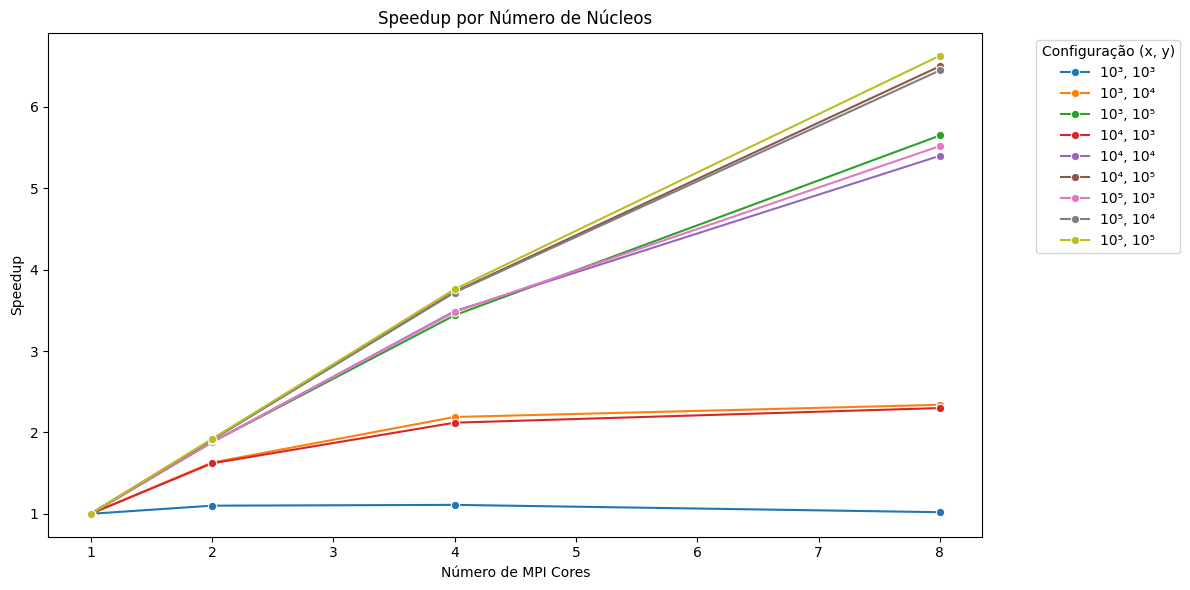

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

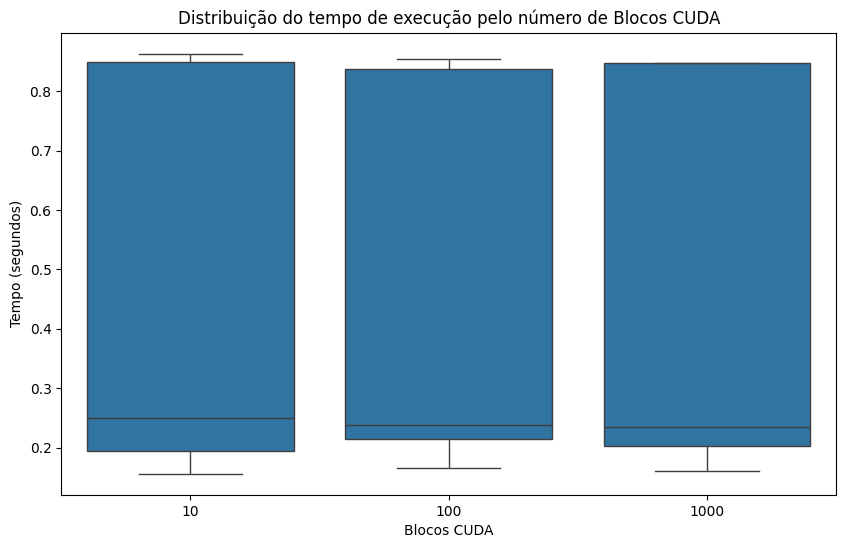

In [6]:
data = {
    'blocos': [10, 10, 10, 10, 10, 10, 10, 10, 10, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
    'x': [1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000,1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000,1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000],
    'y': [1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000,1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000,1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000],
    'real_time': [0.156, 0.194, 0.512, 0.172, 0.250, 0.849, 0.241, 0.863, 7.012, 0.167, 0.238, 0.837, 0.165, 0.235, 0.854, 0.214, 0.668, 5.326, 0.175, 0.234, 0.848, 0.161, 0.225, 0.848, 0.203, 0.637, 4.985 ]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10,6))
bp = sns.boxplot(x='blocos', y='real_time', data=df, showfliers=False)
bp.set(ylabel="Tempo (segundos)", xlabel="Blocos CUDA")
plt.title('Distribuição do tempo de execução pelo número de Blocos CUDA')
plt.show()

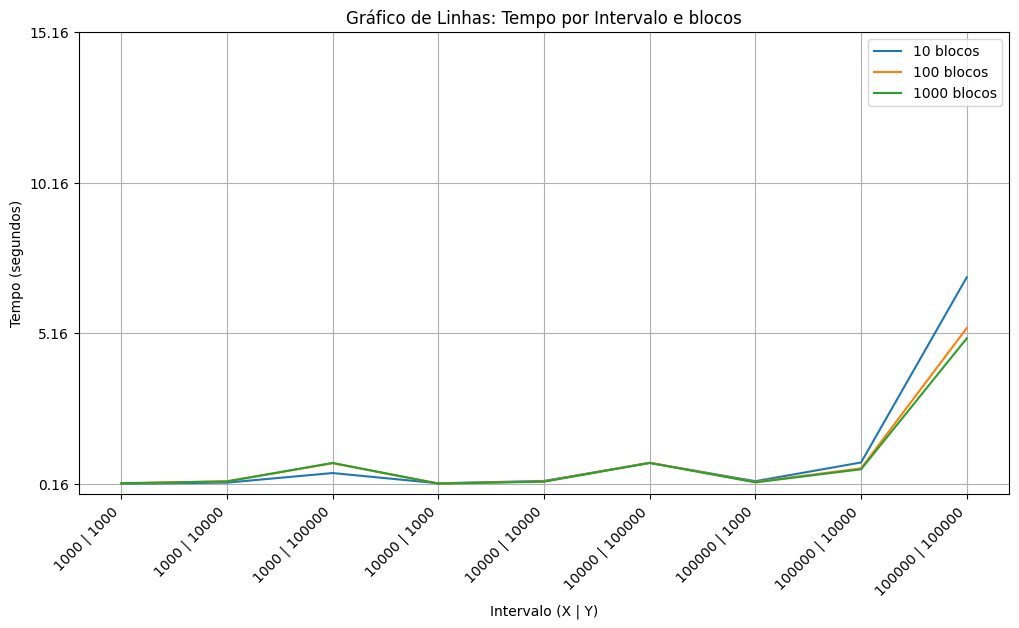

In [15]:
# Criando rótulos para o eixo X
df['intervalo'] = df['x'].astype(str) + ' | ' + df['y'].astype(str)

# Criando o gráfico de linhas
plt.figure(figsize=(12, 6))
for bloco in df['blocos'].unique():
    df_thread = df[df['blocos'] == bloco]
    plt.plot(df_thread['intervalo'], df_thread['real_time'], label=f'{bloco} blocos')

# Configurando o gráfico
plt.title('Gráfico de Linhas: Tempo por Intervalo e blocos')
plt.xlabel('Intervalo (X | Y)')
plt.ylabel('Tempo (segundos)')
plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos do eixo X

# Definindo os ticks do eixo Y manualmente com np.arange()
min_time = df['real_time'].min()
max_time = df['real_time'].max()
plt.yticks(np.arange(min_time, max_time + 10, 5))  # Cria ticks de 10 em 10

plt.legend(loc='best')  # Adicionando legenda
plt.grid(True)  # Adicionando grade

plt.show
plt.savefig('grafico_linhas.png')